In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# 6 ile 7 iptal 



dfs = []
for i in range(9): 
    dfs.append(pd.read_csv(f'Aranged/model_train_{i}.csv'))

In [3]:
loras = []
for i in range(9):
    loras.append(pd.read_csv(f'Aranged/model_lora_{i}.csv'))

In [4]:
new_loras = pd.concat(loras,ignore_index=True).drop(columns=['Unnamed: 0'])

In [5]:
new_loras

,alpha,dropout,r,model
0,32,0.01,32,distilbert-base-uncased-lora-text-classification
1,32,0.01,64,distilbert-base-uncased-lora-text-classification
2,32,0.01,32,distilbert-base-uncased-lora-text-classification
3,32,0.01,4,distilbert-base-uncased-lora-text-classification
4,32,0.01,4,bert-base-cased-lora-text-classification
5,1,0.01,1,bert-base-cased-lora-text-classification
6,32,0.01,4,distilbert-base-uncased-lora-text-classification
7,32,0.01,4,distilbert-base-uncased-lora-text-classification
8,32,0.01,4,roberta-base-lora-text-classification


In [6]:
dfs[1]

,Unnamed: 0,Accuracy,Loss,Time
0,1,0.37,1.16,23.73
1,2,0.36,1.13,24.65
2,3,0.34,1.18,22.65
3,4,0.38,1.11,24.64
4,5,0.36,1.14,23.63
5,6,0.28,1.23,23.86
6,7,0.37,1.26,24.23
7,8,0.36,1.35,23.71
8,9,0.38,1.42,24.49
9,10,0.39,1.46,22.35


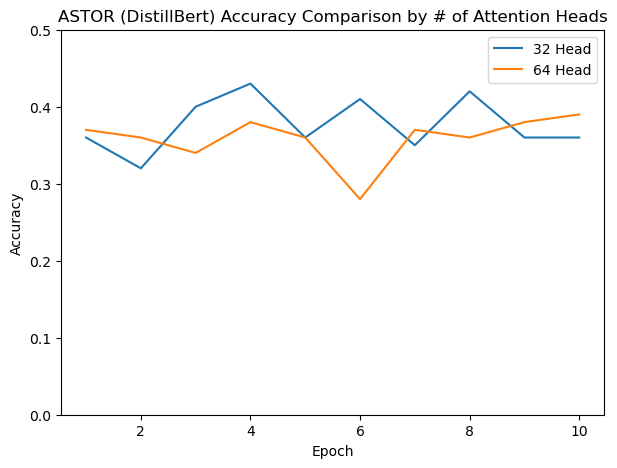

In [7]:
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(dfs[0]['Unnamed: 0'],dfs[0]['Accuracy'],label='32 Head')
ax.plot(dfs[1]['Unnamed: 0'],dfs[1]['Accuracy'],label='64 Head')
ax.set_ylim(0,0.5)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend()
ax.set_title('ASTOR (DistillBert) Accuracy Comparison by # of Attention Heads') 
plt.savefig('Figures/ASTOR_Head_Accuracy.png')
plt.show()

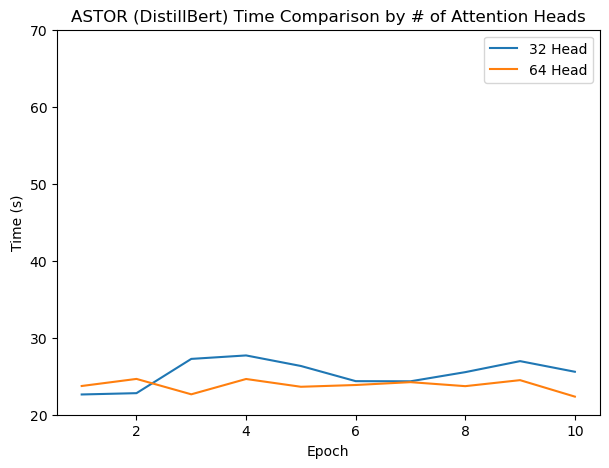

In [8]:
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(dfs[0]['Unnamed: 0'],dfs[0]['Time'],label='32 Head')
ax.plot(dfs[1]['Unnamed: 0'],dfs[1]['Time'],label='64 Head')
ax.set_ylim(20,70)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Epoch')
ax.legend()
ax.set_title('ASTOR (DistillBert) Time Comparison by # of Attention Heads') 
plt.savefig('Figures/ASTOR_Head_Time.png')
plt.show()

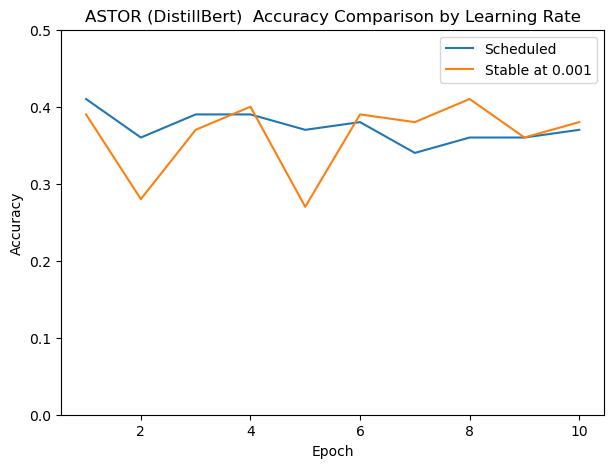

In [9]:
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(dfs[0]['Unnamed: 0'],dfs[3]['Accuracy'],label='Scheduled')
ax.plot(dfs[1]['Unnamed: 0'],dfs[2]['Accuracy'],label='Stable at 0.001')
ax.set_ylim(0,0.5)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend()
ax.set_title('ASTOR (DistillBert)  Accuracy Comparison by Learning Rate') 
plt.savefig('Figures/ASTOR_Learning_Accuracy.png')
plt.show()

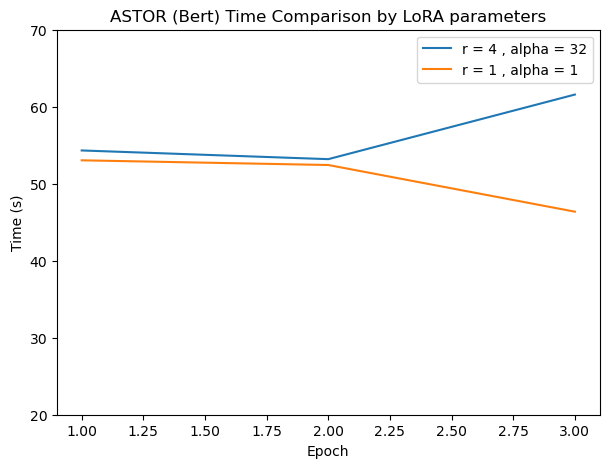

In [62]:
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(dfs[4]['Unnamed: 0'],dfs[4]['Time'],label='r = 4 , alpha = 32')
ax.plot(dfs[5]['Unnamed: 0'],dfs[5]['Time'],label='r = 1 , alpha = 1')
ax.set_ylim(20,70)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Epoch')
ax.legend()
ax.set_title('ASTOR (Bert) Time Comparison by LoRA parameters') 
plt.savefig('Figures/Bert_LoRA_Time.png')
plt.show()

In [ ]:
# Trainable params of 1  1  39171 || all params 10835170 